# Session 1
+ GitHub:
    + public
    + do not share data - .gitignore

### Read/Write
  
+ A reader to read the CONLL06 file and store the sentences
    + A special token ROOT at index 0 of each sentence
    
+ A writer to write the sentences into a CONLL06 file

+ Sanity check: Read from a treebank file then write into another file, compare if they are identical (using diff)
    + Print the attributes of the i-th token in the j-th sentence, and manually verify them
    + Attention: Don’t assume there are always gold heads and dependency relations In the blind test file, those two columns are empty
    
### Evaluation

+ Implement the UAS and LAS from the lecture 
+ Evaluate both scores for the predicted treebank in: /mount/studenten/dependency-parsing/data/english/ dev/wsj_dev.conll06.pred
    + Correct scores should be:
        
        UAS: 23867 / 26595 = 89.74%
        
        LAS: 23434 / 26595 = 88.11%

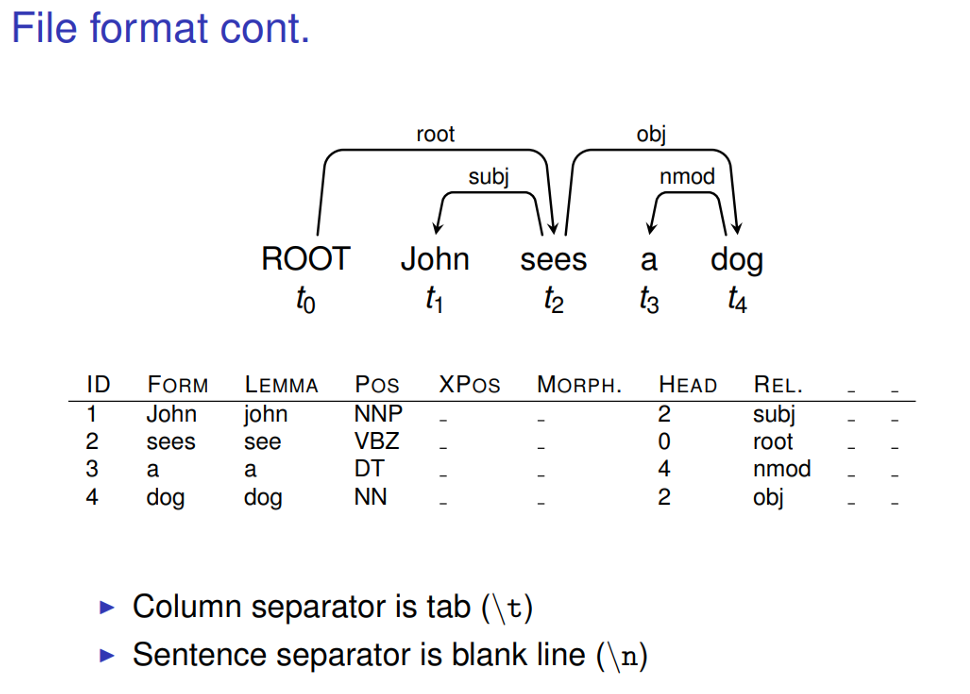

In [8]:
!pip3 install pandas

In [9]:
import os
import pandas as pd

In [12]:
class Read:
    def __init__(self, filepath):
        self.filepath = filepath
        self.data = pd.read_table(self.filepath,
                                  sep='\t',
                                  names=['ID','form','lemma','POS','XPOS','MORPH.','HEAD','REL','-','--'])
    def show_data(self, n_lines):
        print(self.data[:n_lines])

In [16]:
filepath = "data/english/train/wsj_train.first-1k.conll06"

# later: do not hardcode, use sys instead

reader = Read(filepath)
reader.show_data(50)


    ID         form        lemma    POS XPOS MORPH.  HEAD    REL  - --
0    1           In           in     IN    _      _    43    ADV  _  _
1    2           an           an     DT    _      _     5   NMOD  _  _
2    3         Oct.         oct.    NNP    _      _     5   NMOD  _  _
3    4           19            0     CD    _      _     3   NMOD  _  _
4    5       review       review     NN    _      _    20   NMOD  _  _
5    6           of           of     IN    _      _     5   NMOD  _  _
6    7           ``           ``     ``    _      _     9      P  _  _
7    8          The          the     DT    _      _     9   NMOD  _  _
8    9  Misanthrope  misanthrope     NN    _      _     6   PMOD  _  _
9   10           ''           ''     ''    _      _     9      P  _  _
10  11           at           at     IN    _      _     9   NMOD  _  _
11  12      Chicago      chicago    NNP    _      _    15   NMOD  _  _
12  13           's           's    POS    _      _    12   NMOD  _  _
13  14